# Exercício 4

Utilizando o dataset Heart Disease UCI (disponível no repositório da disciplina e em https://www.kaggle.com/ronitf/heart-disease-uci) construa uma arvore de decisão que classifique as amostras em saudáveis (coluna target =0) ou não.

Avalie a precisão, acurácia e mostre a arvore de decisão gerada.
* Existem um ou mais dados categóricos que precisam do devido tratamento.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz, plot_tree
import pydotplus

#import os
#os.environ['PATH'] += os.pathsep + 'C:\\Program Files\\Graphviz 2.44.1\\bin'

## Conforme descrito na página do Kaggle:

Este banco de dados contém 76 atributos, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. Em particular, o banco de dados de Cleveland é o único usado pelos pesquisadores de ML até hoje. O campo "target" refere-se à presença de doença cardíaca no paciente.

Possui as colunas: 
- age - idade em anos
- sex - sexo 
    - 1 = masculino; 
    - 0 = feminino
- cp - tipo de dor no peito (0-3)
- trestbps - pressão arterial em repouso (em mm Hg na admissão ao hospital)
- chol - colesterol sérico em mg/dL
- fbs - Glicemia em jejum > 120 mg/dL 
    - 1 = verdadeiro; 
    - 0 = falso
- restecg - resultados eletrocardiográficos em repouso (0-2)
- thalach - maior frequência cardíaca alcançada
- exang - angina induzida por exercício 
    - 1 = sim; 
    - 0 = não
- oldpeak - Depressão de ST induzida por exercício em relação ao repouso
- slope - a inclinação do segmento ST de pico do exercício (0-2)
- ca - número de vasos principais (0-4) coloridos por fluorosopia
- thal - Um distúrbio no sangue chamado talassemia (0-3)
- target - tem doença ou não
    - 1 = sim; 
    - 0 = não


In [2]:
# Fazendo a leitura do dataset
data = pd.read_csv("bases/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Analisando se existem valores faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Analisando a composição das variáveis numéricas
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


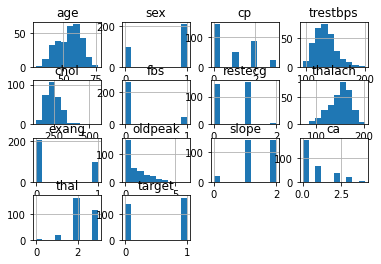

In [5]:
# O dataset não possui valores faltantes, visualisando as variáveis categóricas
data.hist();

In [6]:
# Tratando as variáveis, transnformando variáveis categoricas em dummies
# Criando variaveis dummies
cp_dummies = pd.get_dummies(data['cp'], prefix='cp', drop_first=True)
restecg_dummies = pd.get_dummies(data['restecg'], prefix='restecg', drop_first=True)
slope_dummies = pd.get_dummies(data['slope'], prefix='slope', drop_first=True)
ca_dummies = pd.get_dummies(data['ca'], prefix='ca', drop_first=True)
thal_dummies = pd.get_dummies(data['thal'], prefix='thal', drop_first=True)

# Removendo variáveis 
data.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1, inplace=True)

# Adicionando variaveis dummies
data = pd.concat([data, cp_dummies, restecg_dummies, slope_dummies, ca_dummies, thal_dummies], axis=1)

data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [7]:
# Separando o dataset entre variavel resposta e variaveis de treinamento
X = data.copy()
y = data.iloc[:,data.columns.get_loc('target')].values
X.drop(['target'], axis=1, inplace=True)

# Dividindo conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=25)

In [34]:
best_acc = 0
best_depth = 1

for n in range(2,20):
  classificador = DecisionTreeClassifier(max_depth=n)
  classificador.fit(X_train, y_train)
  y_pred = classificador.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  if acc > best_acc:
    best_acc = acc
    best_depth = n
  print("depth:",n,"=> acc:", acc)

print("A melhor accurácia encontrada foi de:", best_acc, "para a profundidade máxima de", best_depth)

depth: 2 => acc: 0.7868852459016393
depth: 3 => acc: 0.7540983606557377
depth: 4 => acc: 0.7213114754098361
depth: 5 => acc: 0.7377049180327869
depth: 6 => acc: 0.7540983606557377
depth: 7 => acc: 0.7377049180327869
depth: 8 => acc: 0.7049180327868853
depth: 9 => acc: 0.6885245901639344
depth: 10 => acc: 0.7540983606557377
depth: 11 => acc: 0.6885245901639344
depth: 12 => acc: 0.7377049180327869
depth: 13 => acc: 0.7213114754098361
depth: 14 => acc: 0.7377049180327869
depth: 15 => acc: 0.7540983606557377
depth: 16 => acc: 0.7213114754098361
depth: 17 => acc: 0.7213114754098361
depth: 18 => acc: 0.7377049180327869
depth: 19 => acc: 0.7540983606557377
A melhor accurácia encontrada foi de: 0.7868852459016393 para a profundidade máxima de 2


              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

0.7868852459016393


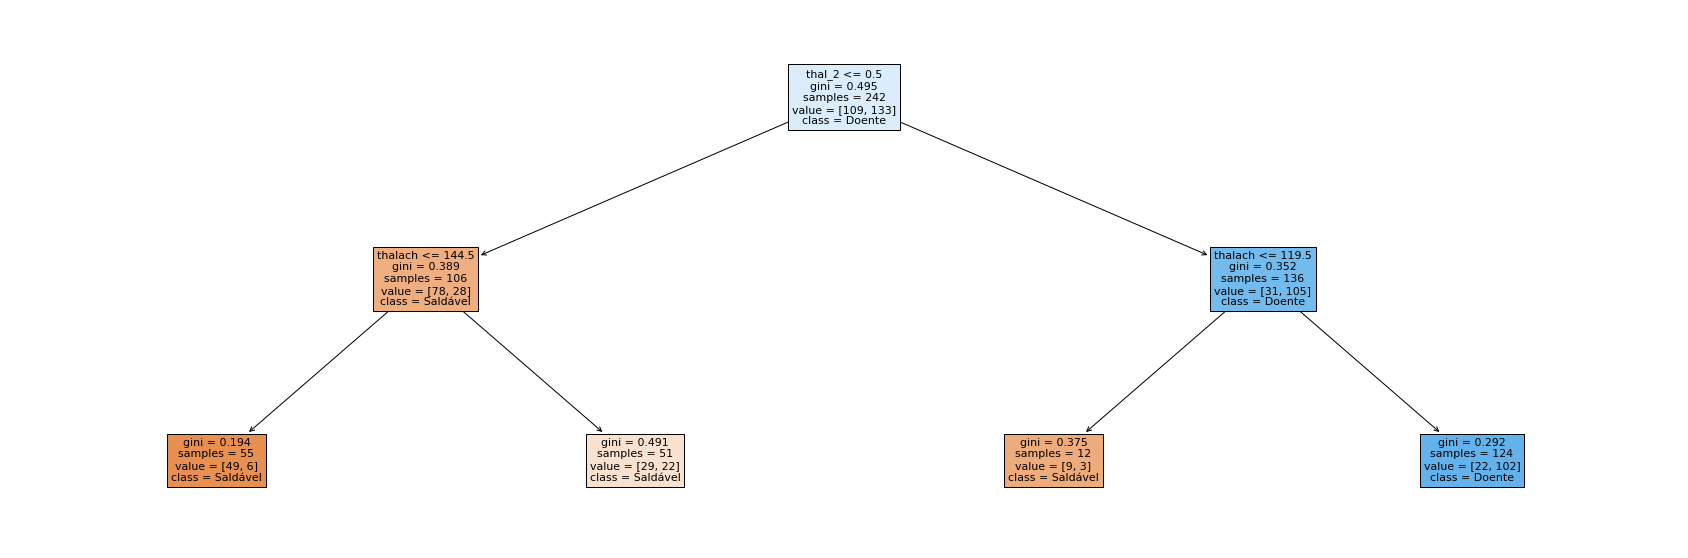

In [42]:
classificador = DecisionTreeClassifier(max_depth=2)
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

# Exportação com o plot_tree
fig, ax = plt.subplots(figsize=(30, 10))
plot_tree(classificador, filled=True, feature_names = X.columns, class_names = ['Saldável', 'Doente'], fontsize=11);

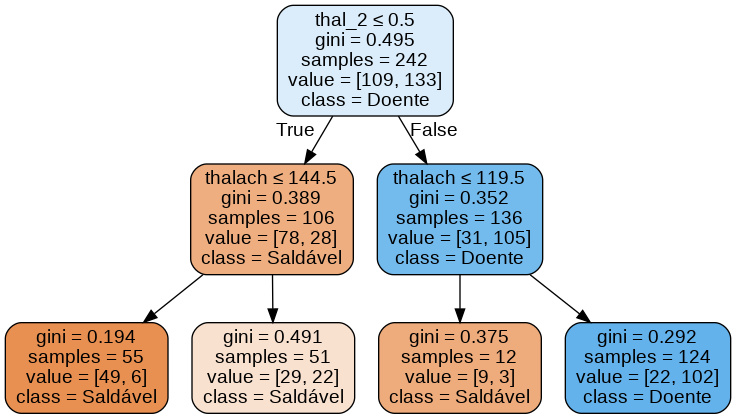

In [37]:
def plot_tree_graphviz():
  #Exportação com graphviz
  dot_data = StringIO()
  export_graphviz(classificador, out_file=dot_data,  
                  filled=True, rounded=True,
                  feature_names = X.columns,
                  class_names = ['Saldável', 'Doente'],
                  special_characters=True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
  
  return graph

#Exportação com graphviz
graph = plot_tree_graphviz()
Image(graph.create_png())

## Avalie a precisão, acurácia e mostre a árvore de decisão gerada.

Após a busca pela melhor configuração, baseada na limitação da profundidade máxima, encontramos a melhor configuração de profundidade igual a 2. Com esta configuração a árvore foi capaz de identificar corretamente 75% das amostras saudáveis e 83% das amostra de pessoas com doenças cardíacas, a acurácia final foi de 0.786. 
As características escolhidas para construção da árvore foram a presença ou ausência do distúrbio talassemia de tipo 2 e a maior frequência cardíaca alcançada.